# Model Project 2021: Solow model with economical damage from climate change

The aim of the project is to solve the basic Solow model and then extend the model to account for economical damage from climate change. 

**The project is organized as follows:**

1. Model project description
2. Model description
3. Basic Solow model
4. Extended Solow model
5. Conclusion

**Group:** SSTL

**Members:** Louise Otte Arildsen (srb330), Signe Kolind (hmk792), Stine Fürst (qvj635) & Thomas Nielsen (qzw392)

**Imports and set magics:**

In [220]:
import modelproject
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm
import ipywidgets as widgets

# Model description

$$
\begin{align}
Y_{t}&=[1-D] K_{t}^{\alpha}\left(A_{t} L_{t}\right)^{1-\alpha}, 0<\alpha<1 \\
D&=1-\frac{1}{1+\sigma(\Delta T)^{2}}, \sigma>0 \\
K_{t+1}&=s Y_{t}+(1-\delta) K_{t}, 0<s<1,0<\delta<1, K_{0}>0  \\
A_{t+1}&=(1+g) A_{t}, A_{0}>0  \\
L_{t+1}&=(1+n) L_{t}, L_{0}>0
\end{align}
$$

$$
\tilde{y}_{t} \equiv \frac{Y_{t}}{A_{t} L_{t}}=\frac{y_{t}}{A_{t}} ; \quad \tilde{k}_{t} \equiv \frac{K_{t}}{A_{t} L_{t}}=\frac{k_{t}}{A_{t}}
$$

!!!Description of the equations and the model!!!


# Basic Solow model

## Analytical solution

Solution:

$$
\tilde{k}_{t+1}=\frac{1}{(1+n)(1+g)}\left(s \tilde{k}_{t}^{\alpha}+(1-\delta) \tilde{k}_{t}\right)
$$

First we define all the **symbols** using sympy:

In [221]:
y = sm.symbols('y')
k = sm.symbols('k')
K = sm.symbols('K')
alpha = sm.symbols('alpha')
sigma = sm.symbols('sigma')
deltaT = sm.symbols('delta T')
s = sm.symbols('s')
delta = sm.symbols('delta')
g = sm.symbols('g')
n = sm.symbols('n')

Then we define the **steady state equation**

In [222]:
ss = sm.Eq(k,(s*k**alpha+(1-delta)*k)/((1+n)*(1+g)))

and **solve** it

In [223]:
kss = sm.solve(ss,k)[0]
kss

((delta + g*n + g + n)/s)**(1/(alpha - 1))

For later use, we turn the solution into a **Python funciton**

In [224]:
#transforming the function to a python function
ss_func = sm.lambdify((s,g,n,alpha,delta),kss)

In [225]:
#Defining parameters
s = 0.3
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.05

In [226]:
print(f'analytical solution is: {ss_func(s,g,n,alpha,delta):.3f}')

analytical solution is: 7.235


Capital per effective worker equals 7.235

## Numerical solution

We can re-write the equation for the steady state capital per capita as

$$
\tilde{k}_{t+1}-\frac{1}{(1+n)(1+g)}\left(s \tilde{k}_{t}^{\alpha}+(1-\delta) \tilde{k}_{t}\right)=0
$$

whereby it clearly becomes a **root-finding problem**. Such a problem can be solved by a **bisection method**.

In [227]:
def solve_for_ss(s,g,n,alpha,delta):
    """ solve for the steady state level of capital

    Args:
        s (float): saving rate
        g (float): technological growth rate
        n (float): population growth rate
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): the solution represented as a RootResults object

    """ 
    
    # a. define objective function
    obj_kss = lambda kss: kss - (s*kss**alpha + (1-delta)*kss)/((1+g)*(1+n))

    #. b. call root finder
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='bisect')
    
    return result


**Solve numerically** for the steady state:

In [228]:
solution = solve_for_ss(s,g,n,alpha,delta)

print(f'analytical solution is: {ss_func(s,g,n,alpha,delta):.3f}')
print(f' numerical solution is: {solution.root:.3f}')

analytical solution is: 7.235
 numerical solution is: 7.235


## BNP pr. effektiv arbejder uden klimaforandringer (D = 0)

Solution:

$$
\tilde{y}^{*^{\prime}}=\left(\frac{s}{n+g+\delta+n g}\right)^{\frac{\alpha}{1-\alpha}}
$$

## solve with sumpy
Using equation (1) (6) and the solution


## Visualization

Transistionsdiagram

## Simulation of the classic Solow model

We want to simulate the classic Solow model, to show how the models converges to the steady state, $\tilde{k}^*$

This function simulates the classic Solow model for $T=100$ periods.

In [250]:
k_path = modelproject.simulate_solow_model(k0,alpha,delta,s,n,g,T,D)

This function represents the steady state value:

In [251]:
k_star = modelproject.find_ssk_k(delta,g,n,alpha,s,D)
k_stars =[k_star for i in range(T)]

We choose the parameters:

In [252]:
k0 =0.1
alpha = 1/3
delta = 0.05
s = 0.3
g = 0.02
n = 0.01
T = 200
D = 0

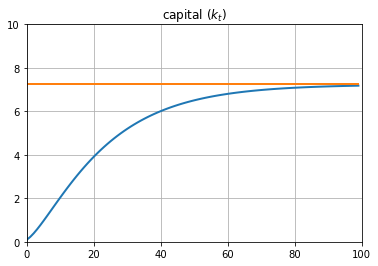

In [254]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(k_path[:T], lw=2)
ax.plot(k_stars,lw=2)
ax.set_title('capital ($k_t$)')
ax.set_xlim([0,100])
ax.set_ylim([0,10])
ax.grid(True);

# Extended Solow Model

$$
\begin{array}{c}
Y_{t}=[1-D] K_{t}^{\alpha}\left(A_{t} L_{t}\right)^{1-\alpha}, 0<\alpha<1 \\
D=1-\frac{1}{1+\sigma(\Delta T)^{2}}, \sigma>0 \\
K_{t+1}=s Y_{t}+(1-\delta) K_{t}, 0<s<1,0<\delta<1, K_{0}>0 \text { givet } \\
A_{t+1}=(1+g) A_{t}, A_{0}>0 \text { givet, } \\
L_{t+1}=(1+n) L_{t}, L_{0}>0 \text { givet. }
\end{array}
$$

$$
\tilde{y}_{t} \equiv \frac{Y_{t}}{A_{t} L_{t}}=\frac{y_{t}}{A_{t}} ; \quad \tilde{k}_{t} \equiv \frac{K_{t}}{A_{t} L_{t}}=\frac{k_{t}}{A_{t}}
$$

## Analytical solution

Solution:
$$
\tilde{k}_{t+1}=\frac{1}{(1+n)(1+g)}\left(s[1-D] \tilde{k}_{t}^{\alpha}+(1-\delta) \tilde{k}_{t}\right)
$$

Then we define the **steady state equation**

In [13]:
# introducing climate effects
y = sm.symbols('y')
k = sm.symbols('k')
K = sm.symbols('K')
alpha = sm.symbols('alpha')
sigma = sm.symbols('sigma')
deltaT = sm.symbols('delta T')
s = sm.symbols('s')
delta = sm.symbols('delta')
g = sm.symbols('g')
n = sm.symbols('n')
D = sm.symbols('D')

# climate steady state
css = sm.Eq(k,(((s*(1-D)*(k**alpha))+((1-delta)*k)))/((1+n)*(1+g)))

and **solve** it:

In [14]:
kcss = sm.solve(css,k)[0]
kcss

((-delta - g*n - g - n)/(s*(D - 1)))**(1/(alpha - 1))

In [15]:
#transforming the function to a python function
css_func = sm.lambdify((s,g,n,alpha,delta,D),kcss)

In [16]:
#Defining parameters
s = 0.3
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.05
D=0.175
print(f'analytical solution is: {css_func(s,g,n,alpha,delta,D):.3f}')

analytical solution is: 5.421


## Numerical solution

In [17]:
def solve_for_css(s,g,n,alpha,delta,D):
    """ solve for the steady state level of capital

    Args:
        s (float): saving rate
        g (float): technological growth rate
        n (float): population growth rate
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): the solution represented as a RootResults object

    """ 
    
    # a. define objective function
    obj_kcss = lambda kcss: kcss - (s*(1-D)*kcss**alpha + (1-delta)*kcss)/((1+g)*(1+n))

    #. b. call root finder
    result = optimize.root_scalar(obj_kcss,bracket=[0.1,100],method='bisect')
    
    return result



In [18]:
solution_2 = solve_for_css(s,g,n,alpha,delta,D)

print(f'analytical solution is: {css_func(s,g,n,alpha,delta,D):.3f}')
print(f' numerical solution is: {solution_2.root:.3f}')

analytical solution is: 5.421
 numerical solution is: 5.421


## BNP pr. effektiv arbejder uden klimaforandringer (D = 0.175)

## Visulization

In [240]:
widgets.interact(modelproject.simulate_basic, 
                k     = widgets.fixed(0), 
                alpha = widgets.FloatSlider(description = '$\u03B1$' , min = 0 ,    max = 0.9 , step = 0.05 , value = 1/3),
                delta = widgets.FloatSlider(description = '$\u03B4$' , min = 0 ,    max = 0.5 , step = 0.01 , value = 0.05),
                s     = widgets.FloatSlider(description = 's' ,        min = 0.01 , max = 0.3 , step = 0.005 , value = 0.3),
                n     = widgets.FloatSlider(description ='$n$',        min = 0.01 , max = 0.1 , step = 0.005, value = 0.01),
                g     = widgets.FloatSlider(description ='$g$',        min = 0.01 , max = 0.1 , step = 0.005, value = 0.02),
                D     = widgets.FloatSlider(description ='$D$',        min = 0.0 , max = 1 , step = 0.005, value = 0),
                K     = widgets.fixed(1),
                T     = widgets.IntSlider(description='$T$' ,          min = 1,     max = 1000, step = 10,    value = 10))

interactive(children=(FloatSlider(value=0.3333333333333333, description='$α$', max=0.9, step=0.05), FloatSlide…

<function modelproject.simulate_basic(k, alpha, delta, s, n, g, K, T, D)>

## Simulation

We want to simulate the classic Solow model, to show how the models converges to the steady state, $\tilde{k}^*$

This function simulates the classic Solow model for $T=100$ periods.

In [260]:
k_path = modelproject.simulate_solow_model(k0,alpha,delta,s,n,g,T,D)

This function represents the steady state value:

In [261]:
k_star = modelproject.find_ssk_k(delta,g,n,alpha,s,D)
k_stars =[k_star for i in range(T)]

In [262]:
k0 =0.1
alpha = 1/3
delta = 0.05
s = 0.3
g = 0.02
n = 0.01
T = 200
D = 0.175

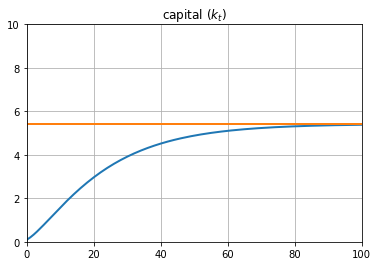

In [263]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(k_path[:T], lw=2)
ax.plot(k_stars,lw=2)
ax.set_title('capital ($k_t$)')
ax.set_xlim([0,100])
ax.set_ylim([0,10])
ax.grid(True);

## Comparison with classic Solow model

# Conclusion

ADD CONCISE CONCLUSION.